In [13]:

import six
import sys
sys.modules['sklearn.externals.six'] = six
from scipy.stats import kurtosis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from time import time
import math
from yellowbrick.model_selection import LearningCurve

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import random_projection
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy.stats import kurtosis
import numpy as np
import mlrose_hiive 
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import itertools
import pandas as pd
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.mixture import GaussianMixture
import time
import seaborn as sns
from scipy.stats import kurtosis
from sklearn import random_projection
from sklearn.manifold import TSNE

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


from sklearn.metrics.cluster import adjusted_rand_score






In [57]:
#Import league_games.csv into a dataframe
league_games = pd.read_csv(r'C:\\Users\\Jampy\\Machine Learning\\league_games.csv',delimiter=';')

# isolate columns that are needed gamelength, t1_ban1


league_games_y = league_games[['t1_result']]
league_games_y.head(40)

#league_games print column names
#print every column name without the ...
#make a list of ['t1p1_kills',...'t2p5_kills']
column_list = ['t1_firstblood', 't1_firstdragon', 't1_dragons','t2_firstblood', 't2_firstdragon', 't2_dragons']
for i in range(1,6):
    for j in range(1,3):
        column_list.append('t'+str(j)+'p'+str(i)+'_kills')
        column_list.append('t'+str(j)+'p'+str(i)+'_deaths')
        column_list.append('t'+str(j)+'p'+str(i)+'_assists')
league_games_X = league_games[column_list]

#replace Nan with row mean
league_games_X = league_games_X.fillna(league_games_X.mean())

#ravel the y
league_games_y = league_games_y.values.ravel()

#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(league_games_X, league_games_y, test_size=0.2, random_state=42)

league_games_X.shape

(5149, 36)

In [34]:
#load wine data
wine = pd.read_csv(r'C:\Users\Jampy\Machine Learning\A3\winequality-white.csv',delimiter=';')

wine_y = wine[['quality']]
wine_X = wine.drop(['quality'],axis=1)

wine_X = (wine_X-wine_X.min())/(wine_X.max()-wine_X.min())

#print uniques values and their counts
wine_y['quality'].value_counts()

wine_X = wine_X
wine_y = wine_y.values.ravel()

wine_X.shape

(4898, 11)

Wine K-Means Clustering
optimal_num_clusters 6
adjusted_rand_score:  0.047
run time:  0.066 seconds

League K-Means Clustering
optimal_num_clusters 4
adjusted_rand_score:  0.45
run time:  0.079 seconds

League EM
optimal_num_clusters 4
adjusted_rand_score:  0.45
run time:  0.063 seconds

Wine EM
optimal_num_clusters 6
adjusted_rand_score:  0.047
run time:  0.068 seconds



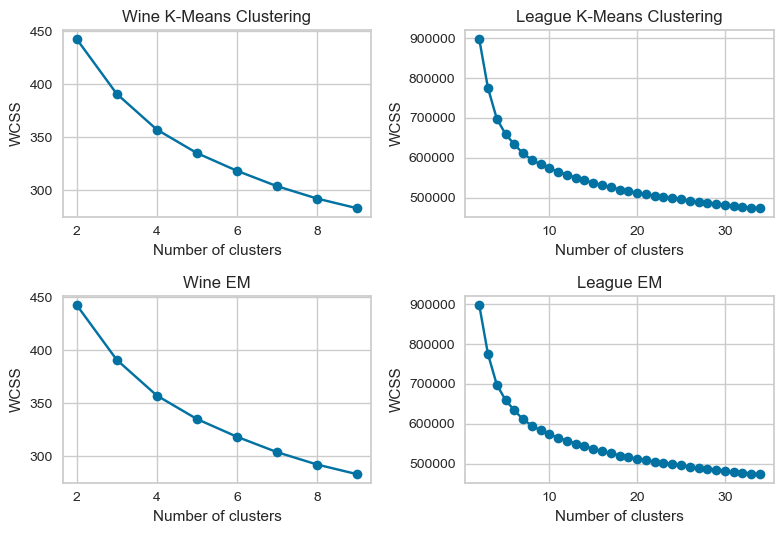

In [39]:
#Part 1
#K-Means Clustering 
fig, ax = plt.subplots(2,2)

####################################### Wine and kmeans
axis_num = [0,0]
optimal_num_clusters = 6
graph_title = "Wine K-Means Clustering"
data = wine_X
labels = wine_y
max_num_clusters = data.shape[1] - 1


wcss = []
for i in range(2, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, max_num_clusters), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')




print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################League and k-means
axis_num = [0,1]
optimal_num_clusters = 4 
graph_title = "League K-Means Clustering"
data = league_games_X
labels = league_games_y
max_num_clusters = data.shape[1] - 1


wcss = []
for i in range(2, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, max_num_clusters), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')


print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))

start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################League and GMM

axis_num = [1,1]
optimal_num_clusters = 4 
graph_title = "League EM"
data = league_games_X
labels = league_games_y
max_num_clusters = data.shape[1] - 1

wcss = []
for i in range(2, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2,max_num_clusters), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


axis_num = [1,0]
optimal_num_clusters = 6
graph_title = "Wine EM"
data = wine_X
labels = wine_y
max_num_clusters = data.shape[1] - 1


wcss = []
for i in range(2, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, max_num_clusters), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")



#######################################make entire figure visible
plt.tight_layout()
fig.show()






Wine PCA Eigenvalues
fit time:  0.004 seconds
baseline fit time:  0.241 seconds
pca fit time:  0.209 seconds
baseline_accuracy:  0.591
pca_accuracy:  0.51

League of Legends PCA Eigenvalues
fit time:  0.009 seconds
baseline fit time:  0.176 seconds
pca fit time:  0.149 seconds
baseline_accuracy:  0.954
pca_accuracy:  0.951



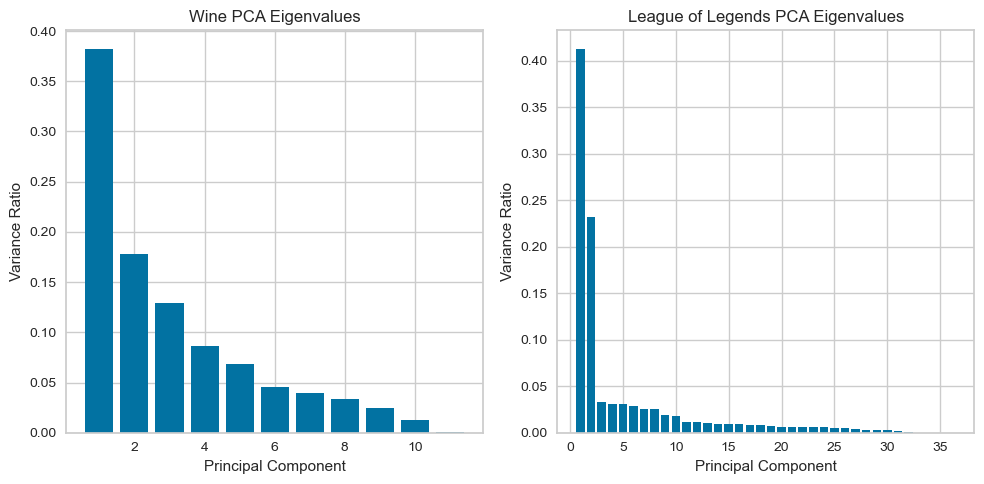

In [38]:
#Part 2 PCA

fig, ax = plt.subplots(1,2,figsize=(10,5))

####################################### #PCA wine
axis_num = 0
graph_title = "PCA Wine Eigenvalues"
data = wine_X
labels = wine_y
optimal_num_components = 3
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

graph_title = "Wine PCA Eigenvalues"

#Graph the eigenvalues for each component
pca = PCA()
pca.fit(data)
eigenvalues = pca.explained_variance_ / np.sum(pca.explained_variance_)


ax[axis_num ].bar(range(1, len(eigenvalues) + 1), eigenvalues)
ax[axis_num ].set_xlabel('Principal Component')
ax[axis_num ].set_ylabel('Variance Ratio')
ax[axis_num ].set_title(graph_title)

#PCA fit_predict
print(graph_title)
start = time.time()
PCA(n_components=optimal_num_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the PCA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
pca = PCA(n_components=optimal_num_components)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_pca = RandomForestClassifier(random_state=42)
start = time.time()
model_with_pca.fit(X_train_pca, y_train)
end = time.time()
print("pca fit time: ", round(end - start,3), "seconds")
y_pred_pca = model_with_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("pca_accuracy: ", round(pca_accuracy,3))
print("")

#apply kmeans to the pca data
kmeans = KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(X_train_pca)

####################################### #PCA League of Legends

axis_num = 1
graph_title = "PCA wine Eigenvalues"
data = league_games_X
labels = league_games_y
optimal_num_components = 2
graph_title = "League of Legends PCA Eigenvalues"
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

#Graph the eigenvalues for each component
pca = PCA()
pca.fit(data)
eigenvalues = pca.explained_variance_ / np.sum(pca.explained_variance_)


ax[axis_num ].bar(range(1, len(eigenvalues) + 1), eigenvalues)
ax[axis_num ].set_xlabel('Principal Component')
ax[axis_num ].set_ylabel('Variance Ratio')
ax[axis_num ].set_title(graph_title)

#PCA fit_predict
print(graph_title)
start = time.time()
PCA(n_components=optimal_num_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the PCA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
pca = PCA(n_components=optimal_n_components)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_pca = RandomForestClassifier(random_state=42)
start = time.time()
model_with_pca.fit(X_train_pca, y_train)
end = time.time()
print("pca fit time: ", round(end - start,3), "seconds")
y_pred_pca = model_with_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test, y_pred_pca)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("pca_accuracy: ", round(pca_accuracy,3))
print("")





####################################### Make entire figure visible
plt.tight_layout()
fig.show()

(4898, 12)
ICA wine
fit time:  0.027 seconds
baseline fit time:  0.251 seconds
ica fit time:  0.299 seconds
baseline_accuracy:  0.591
ICP_accuracy:  0.588

ICA League of Legends
fit time:  0.256 seconds
baseline fit time:  0.156 seconds
ica fit time:  0.358 seconds
baseline_accuracy:  0.954
ICP_accuracy:  0.918



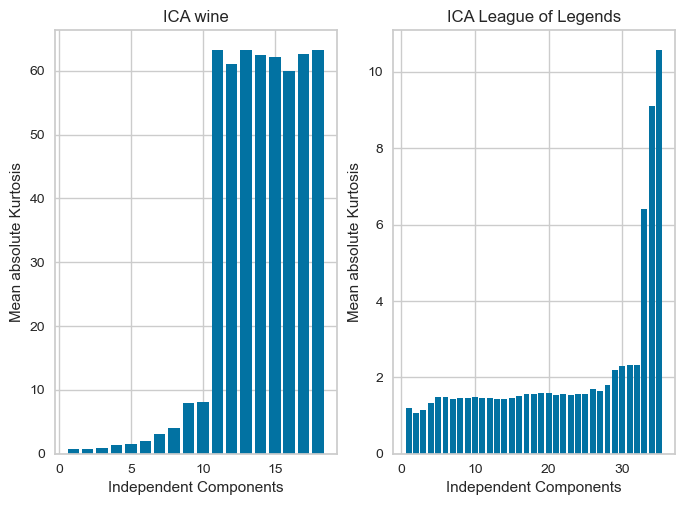

In [49]:
#Part 2 ICA

fig, ax = plt.subplots(1,2,)
mpl.rcParams['image.cmap'] = 'jet'

####################################### ICA wine
axis_num = 0
graph_title = "ICA wine"
data = wine_X
labels = wine_y
optimal_n_components = 11
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)
print(wine.shape)

#graph the kurtosis for each component
ica = FastICA()
ica.fit(data)
n_components_range = range(1, data.shape[1]+8)
mean_abs_kurtosis = []

for n_components in n_components_range:
    ica = FastICA(n_components=n_components)
    X_transformed = ica.fit_transform(data)
    abs_kurtosis = np.abs(kurtosis(X_transformed, axis=0))
    mean_abs_kurtosis.append(np.mean(abs_kurtosis))


ax[axis_num ].bar(range(1, len(mean_abs_kurtosis) + 1), mean_abs_kurtosis)
ax[axis_num ].set_xlabel('Independent Components')
ax[axis_num ].set_ylabel('Mean absolute Kurtosis')
ax[axis_num ].set_title(graph_title)

print(graph_title)
start = time.time()
FastICA(n_components=optimal_n_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the ICA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
ica = FastICA(n_components=optimal_n_components) 
X_train_ica = ica.fit_transform(X_train)
X_test_ica= ica.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_ica = RandomForestClassifier(random_state=42)
start = time.time()
model_with_ica.fit(X_train_ica, y_train)
end = time.time()
print("ica fit time: ", round(end - start,3), "seconds")
y_pred_ica = model_with_ica.predict(X_test_ica)
ica_accuracy = accuracy_score(y_test, y_pred_ica)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("ICP_accuracy: ", round(ica_accuracy,3))
print("")



####################################### ICA League of Legends


axis_num = 1
graph_title = "ICA League of Legends"
data = league_games_X
labels = league_games_y
optimal_n_components = 31
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)

#graph the kurtosis for each component
ica = FastICA()
ica.fit(data)
n_components_range = range(1, data.shape[1])
mean_abs_kurtosis = []

for n_components in n_components_range:
    ica = FastICA(n_components=n_components)
    X_transformed = ica.fit_transform(data)
    abs_kurtosis = np.abs(kurtosis(X_transformed, axis=0))
    mean_abs_kurtosis.append(np.mean(abs_kurtosis))


ax[axis_num ].bar(range(1, len(mean_abs_kurtosis) + 1), mean_abs_kurtosis)
ax[axis_num ].set_xlabel('Independent Components')
ax[axis_num ].set_ylabel('Mean absolute Kurtosis')
ax[axis_num ].set_title(graph_title)

print(graph_title)
start = time.time()
FastICA(n_components=optimal_n_components).fit_transform(data)
end = time.time()
print("fit time: ", round(end - start,3), "seconds")

#Evaluate the ICA using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply PCA
ica = FastICA(n_components=optimal_n_components) 
X_train_ica = ica.fit_transform(X_train)
X_test_ica= ica.transform(X_test)

# Step 4: Build a model with PCA-transformed features
model_with_ica = RandomForestClassifier(random_state=42)
start = time.time()
model_with_ica.fit(X_train_ica, y_train)
end = time.time()
print("ica fit time: ", round(end - start,3), "seconds")
y_pred_ica = model_with_ica.predict(X_test_ica)
ica_accuracy = accuracy_score(y_test, y_pred_ica)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("ICP_accuracy: ", round(ica_accuracy,3))
print("")


baseline fit time:  0.259 seconds
rp fit time:  0.213 seconds
baseline_accuracy:  0.591
rp_accuracy:  0.462

baseline fit time:  0.181 seconds
rp fit time:  0.148 seconds
baseline_accuracy:  0.954
rp_accuracy:  0.909



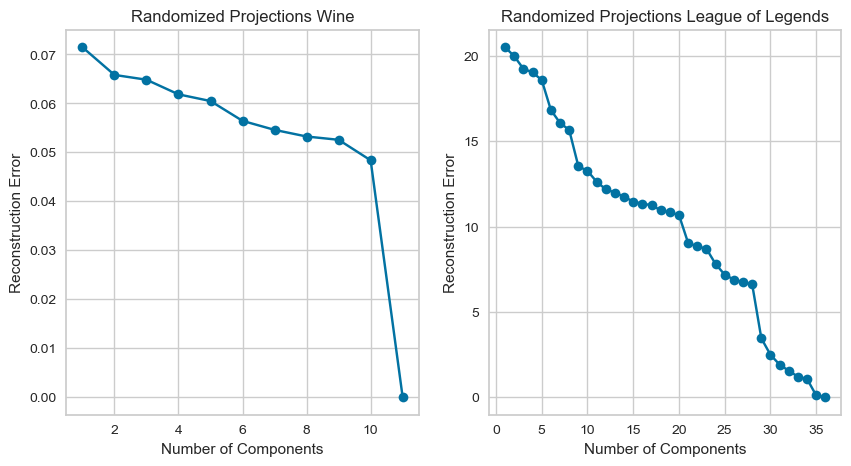

In [58]:
# Part 2 Randomized Projections

fig, ax = plt.subplots(1,2,figsize=(10,5))

####################################### Randomized Projections wine
axis_num = 0
graph_title = "Randomized Projections Wine"
data = wine_X
labels = wine_y
optimal_n_components = 2
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)
n_components_range = range(1, data.shape[1] + 1)

reconstruction_errors = []

for n_components in n_components_range:
    rp = random_projection.GaussianRandomProjection(n_components= n_components, random_state=42)
    X_projected = rp.fit_transform(data)
    X_reconstructed = np.dot(X_projected, np.linalg.pinv(rp.components_.T))
    reconstruction_error = np.mean((data - X_reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)





#calculate reconstruction error
reconstruction_error = ((data - rp.inverse_transform(rp.transform(data))) ** 2).mean()
#plot the reconstruction error
ax[axis_num ].plot(n_components_range, reconstruction_errors, marker='o')
ax[axis_num ].set_xlabel('Number of Components')
ax[axis_num ].set_ylabel('Reconstruction Error')
ax[axis_num ].set_title(graph_title)

#evaluate the randomized projections using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply RA
rp = random_projection.GaussianRandomProjection(n_components=optimal_n_components, random_state=42)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)

# Step 4: Build a model with RP-transformed features
model_with_rp = RandomForestClassifier(random_state=42)
start = time.time()
model_with_rp.fit(X_train_rp, y_train)
end = time.time()
print("rp fit time: ", round(end - start,3), "seconds")
y_pred_rp = model_with_rp.predict(X_test_rp)
rp_accuracy = accuracy_score(y_test, y_pred_rp)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("rp_accuracy: ", round(rp_accuracy,3))
print("")
####################################### Randomized Projections League of Legends


axis_num = 1
graph_title = "Randomized Projections League of Legends"
data = league_games_X
labels = league_games_y
optimal_n_components = 2
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)
n_components_range = range(1, data.shape[1] + 1)

reconstruction_errors = []

for n_components in n_components_range:
    rp = random_projection.GaussianRandomProjection(n_components= n_components, random_state=42)
    X_projected = rp.fit_transform(data)
    X_reconstructed = np.dot(X_projected, np.linalg.pinv(rp.components_.T))
    reconstruction_error = np.mean((data - X_reconstructed) ** 2)
    reconstruction_errors.append(reconstruction_error)





#calculate reconstruction error
reconstruction_error = ((data - rp.inverse_transform(rp.transform(data))) ** 2).mean()
#plot the reconstruction error
ax[axis_num ].plot(n_components_range, reconstruction_errors, marker='o')
ax[axis_num ].set_xlabel('Number of Components')
ax[axis_num ].set_ylabel('Reconstruction Error')
ax[axis_num ].set_title(graph_title)

#evaluate the randomized projections using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply RA
rp = random_projection.GaussianRandomProjection(n_components=optimal_n_components, random_state=42)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)

# Step 4: Build a model with RP-transformed features
model_with_rp = RandomForestClassifier(random_state=42)
start = time.time()
model_with_rp.fit(X_train_rp, y_train)
end = time.time()
print("rp fit time: ", round(end - start,3), "seconds")
y_pred_rp = model_with_rp.predict(X_test_rp)
rp_accuracy = accuracy_score(y_test, y_pred_rp)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("rp_accuracy: ", round(rp_accuracy,3))
print("")




baseline fit time:  0.24 seconds
tsne fit time:  0.197 seconds
baseline_accuracy:  0.591
tsne_accuracy:  0.379

baseline fit time:  0.172 seconds
tsne fit time:  0.157 seconds
baseline_accuracy:  0.954
tsne_accuracy:  0.872



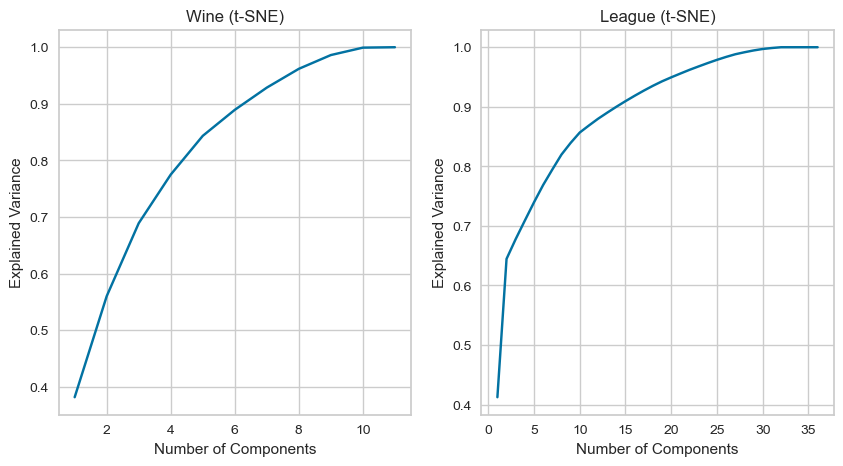

In [54]:
#Part 2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

fig, ax = plt.subplots(1,2,figsize=(10,5))

####################################### t-SNE wine

axis_num = 0
graph_title = "Wine (t-SNE)"
data = wine_X
labels = wine_y
optimal_n_components = 3
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)


explained_variance = []
for n_components in range(1, data.shape[1] + 1):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    explained_variance.append(pca.explained_variance_ratio_.sum())

#plot the explained variance
ax[axis_num ].plot(range(1, len(explained_variance) + 1), explained_variance)
ax[axis_num ].set_xlabel('Number of Components')
ax[axis_num ].set_ylabel('Explained Variance')
ax[axis_num ].set_title(graph_title)

#evaluate the t-SNE using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=optimal_n_components, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Step 4: Build a model with t-SNE-transformed features
model_with_tsne = RandomForestClassifier(random_state=42)
start = time.time()
model_with_tsne.fit(X_train_tsne, y_train)
end = time.time()
print("tsne fit time: ", round(end - start,3), "seconds")
y_pred_tsne = model_with_tsne.predict(X_test_tsne)
tsne_accuracy = accuracy_score(y_test, y_pred_tsne)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("tsne_accuracy: ", round(tsne_accuracy,3))
print("")

####################################### t-SNE League of Legends

axis_num = 1
graph_title = "League (t-SNE)"
data = league_games_X
labels = league_games_y
optimal_n_components = 3
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.2, random_state=42)


explained_variance = []
for n_components in range(1, data.shape[1] + 1):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    explained_variance.append(pca.explained_variance_ratio_.sum())

#plot the explained variance
ax[axis_num ].plot(range(1, len(explained_variance) + 1), explained_variance)
ax[axis_num ].set_xlabel('Number of Components')
ax[axis_num ].set_ylabel('Explained Variance')
ax[axis_num ].set_title(graph_title)

#evaluate the t-SNE using a random forest classifier

#baseline model
baseline_model = RandomForestClassifier(random_state=42)
start = time.time()
baseline_model.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
y_pred_baseline = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Step 3: Apply t-SNE
tsne = TSNE(n_components=optimal_n_components, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

# Step 4: Build a model with t-SNE-transformed features
model_with_tsne = RandomForestClassifier(random_state=42)
start = time.time()
model_with_tsne.fit(X_train_tsne, y_train)
end = time.time()
print("tsne fit time: ", round(end - start,3), "seconds")
y_pred_tsne = model_with_tsne.predict(X_test_tsne)
tsne_accuracy = accuracy_score(y_test, y_pred_tsne)

print("baseline_accuracy: ", round(baseline_accuracy,3))
print("tsne_accuracy: ", round(tsne_accuracy,3))
print("")





Wine PCA into K-Means 
optimal_num_clusters 4
adjusted_rand_score:  0.063
run time:  0.038 seconds

League of Legends RP into K-Means
optimal_num_clusters 4
adjusted_rand_score:  0.385
run time:  0.032 seconds

League of Legends RP into GMM
optimal_num_clusters 4
adjusted_rand_score:  0.385
run time:  0.032 seconds

Wine PCA into GMM
optimal_num_clusters 4
adjusted_rand_score:  0.063
run time:  0.038 seconds



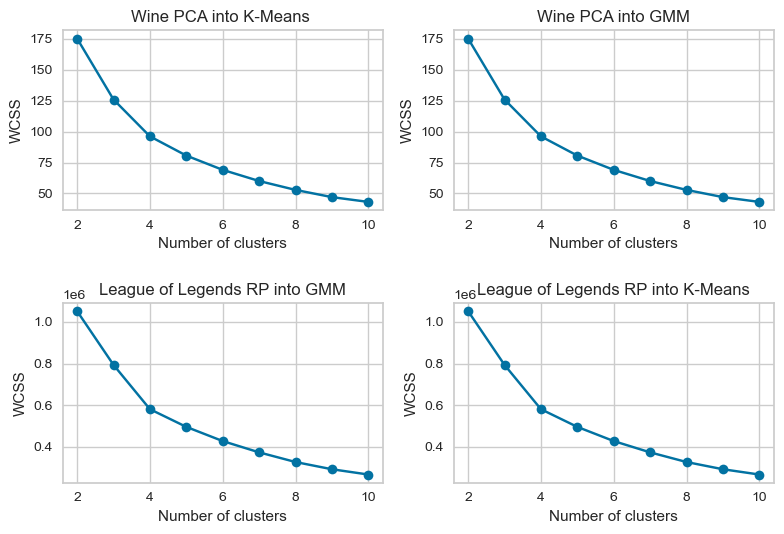

In [55]:
#Part 3 , DR and then clustering , only using 
#Apply PCA, ICA, RP, and t-SNE to the wine dataset and then apply k-means clustering 
#to the results of each dimensionality reduction technique.

#PCA
#wine
optimal_n_components = 2
data = wine_X
labels = wine_y

# Step 3: Apply PCA
pca = PCA(n_components=optimal_n_components)  # Retain 95% of the variance
data_pca = pca.fit_transform(data)


#Randomized Projections
#league of legends
optimal_n_components = 2
data = league_games_X
labels = league_games_y

# Step 3: Apply RP
rp = random_projection.GaussianRandomProjection(n_components=optimal_n_components, random_state=42)
data_rp = rp.fit_transform(data)




#Apply clusting to the results of each dimensionality reduction technique

fig, ax = plt.subplots(2,2)

#######################################wine and kmeans
axis_num = [0,0]
optimal_num_clusters = 4 
graph_title = "Wine PCA into K-Means "
data = data_pca
labels = wine_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')




print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################League and k-means
axis_num = [1,1]
optimal_num_clusters = 4 
graph_title = "League of Legends RP into K-Means"
data = data_rp 
labels = league_games_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')


print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))

start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")

###################################### wine RP and GMM
axis_num = [1,0]
optimal_num_clusters = 4 
graph_title = "League of Legends RP into GMM"
data = data_rp
labels = league_games_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")


######################################League and GMM

axis_num = [0,1]
optimal_num_clusters = 4 
graph_title = "Wine PCA into GMM"
data = data_pca
labels = wine_y


wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

ax[axis_num[0],axis_num[1]].plot(range(2, 11), wcss, marker='o')
ax[axis_num[0],axis_num[1]].set_title(graph_title)
ax[axis_num[0],axis_num[1]].set_xlabel('Number of clusters')
ax[axis_num[0],axis_num[1]].set_ylabel('WCSS')



print(graph_title)
print("optimal_num_clusters" , optimal_num_clusters)
print("adjusted_rand_score: ",round(adjusted_rand_score(labels, KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)),3))
start = time.time()
KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(data)
end = time.time()
print("run time: ", round(end - start,3), "seconds")
print("")



#######################################make entire figure visible
plt.tight_layout()
fig.show()





baseline fit time:  310.533 seconds
ica fit time:  27.669 seconds
tsne fit time:  75.86 seconds


Text(0.5, 1.0, 'Wine Neural Network t-SNE')

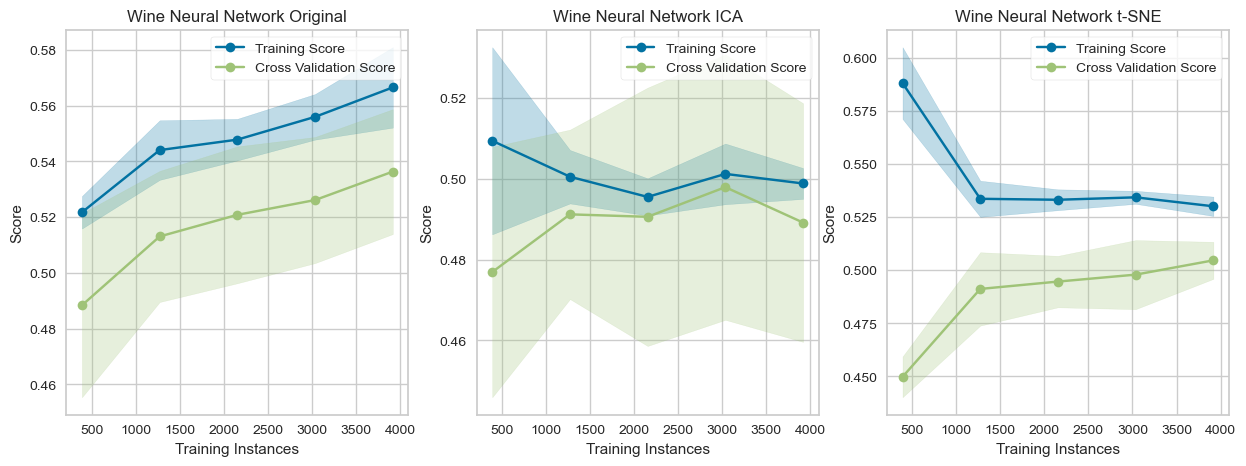

In [31]:
#Part 4, ICA and then Nueral Network
#wine Neural Network
#wine
figure, ax = plt.subplots(1,3,figsize=(15,5))

graph_title = "Wine Neural Network Original"
axis_num = 0
optimal_n_components = 2  
data = wine_X
labels = wine_y

X_train = data
y_train = labels



param_grid = {'hidden_layer_sizes': [(100,100,100), (100,50,100), (50,100,50)], 'activation': ['tanh', 'relu'], 'solver': ['sgd','adam'], 'alpha': [.05,.01,.005,.001]}
grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=10000), param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train, y_train)
end = time.time()
print("baseline fit time: ", round(end - start,3), "seconds")
learning_curve.finalize()
ax[axis_num].set_title(graph_title)



# Apply ICA
ica = FastICA(n_components=optimal_n_components, random_state=42)
X_train_ica = ica.fit_transform(X_train)

graph_title = "Wine Neural Network ICA"
axis_num = 1

grid_search.fit(X_train_ica, y_train)
best_model = grid_search.best_estimator_

learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_ica, y_train)
end = time.time()
print("ica fit time: ", round(end - start,3), "seconds")

learning_curve.finalize()
ax[axis_num].set_title(graph_title)


# apply t-SNE
tsne = TSNE(n_components=optimal_n_components, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

graph_title = "Wine Neural Network t-SNE"
axis_num = 2

grid_search.fit(X_train_tsne, y_train)
best_model = grid_search.best_estimator_

learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_tsne, y_train)
end = time.time()
print("tsne fit time: ", round(end - start,3), "seconds")

learning_curve.finalize()
ax[axis_num].set_title(graph_title)





kmeans time:  236.692 seconds
gmm fit time:  219.275 seconds


Text(0.5, 1.0, 'Wine Neural Network GMM as new features')

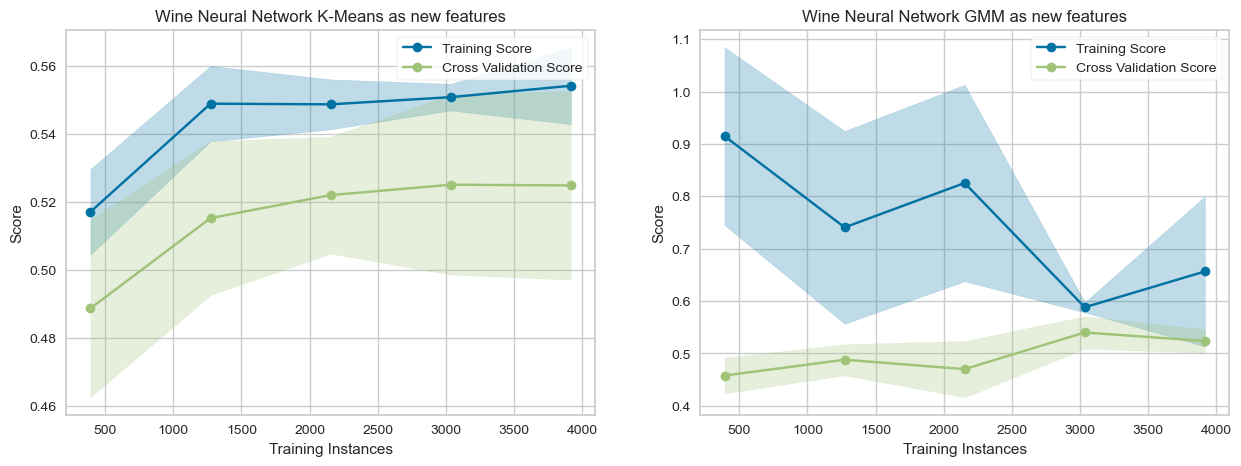

In [32]:
#Part 5 rerun part four with Clustering as new features

fig, ax = plt.subplots(1,2,figsize=(15,5))

#K-Means Clusterts as new features
#wine

graph_title = "Wine Neural Network K-Means as new features"
axis_num = 0

optimal_num_clusters = 4
data = wine_X
labels = wine_y
X_test, X_train, y_test, y_train = train_test_split(data, labels, test_size=0.1, random_state=42)

X_train = data
y_train = labels

# apply kmeans
kmeans = KMeans(n_clusters=optimal_num_clusters , random_state=0).fit_predict(X_train)

#add the kmeans clusters to the data
X_train_kmeans = np.column_stack((X_train,kmeans))

param_grid = {'hidden_layer_sizes': [(100,100,100), (100,50,100), (50,100,50)], 'activation': ['tanh', 'relu'], 'solver': ['sgd','adam'], 'alpha': [.05,.01,.005,.001]}
grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=10000), param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1)
grid_search.fit(X_train_kmeans, y_train)
best_model = grid_search.best_estimator_


learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_kmeans, y_train)
end = time.time()
print("kmeans time: ", round(end - start,3), "seconds")
learning_curve.finalize()
ax[axis_num].set_title(graph_title)


#GMM Clusterts as new features
#wine

graph_title = "Wine Neural Network GMM as new features"
axis_num = 1

# apply kmeans
gmm = GaussianMixture(n_components=optimal_num_clusters, random_state=0).fit_predict(X_train)

#add the kmeans clusters to the data
X_train_gmm = np.column_stack((X_train,gmm))

grid_search.fit(X_train_gmm, y_train)
best_model = grid_search.best_estimator_

learning_curve = LearningCurve(best_model, scoring='accuracy',ax=ax[axis_num])
start = time.time()
learning_curve.fit(X_train_gmm, y_train)
end = time.time()
print("gmm fit time: ", round(end - start,3), "seconds")
learning_curve.finalize()
ax[axis_num].set_title(graph_title)

